<img src="https://devra.ai/analyst/notebook/1260/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><div style="font-size:150%; color:#FEE100"><b>Lung Cancer Risk Factors and Prediction Analysis</b></div><div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>

# A Curious Look at Lung Cancer Data

Lung health is a complex interplay of multiple factors. In this notebook, we explore a dataset related to lung cancer risk factors, and ultimately build a prediction model for pulmonary disease. If you find these analyses useful, please consider upvoting this notebook.

## Table of Contents

1. [Introduction and Data Loading](#Introduction-and-Data-Loading)
2. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Correlation Analysis](#Correlation-Analysis)
    - [Distribution and Categorical Plots](#Distribution-and-Categorical-Plots)
4. [Predictor Model](#Predictor-Model)
5. [Conclusion and Future Work](#Conclusion-and-Future-Work)

In [1]:
# Import required libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Use Agg backend for non-interactive plotting
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Set plot style
sns.set(style='whitegrid')

# Optional: increase figure size for better clarity
plt.rcParams['figure.figsize'] = (10, 6)

## Introduction and Data Loading

We begin our journey by loading the lung cancer dataset. The data contains a variety of factors such as age, smoking habits, energy level, and several others. One particularly interesting column is the 'PULMONARY_DISEASE' which will serve as our target variable for prediction.

In [2]:
# Load the lung cancer dataset
data_path = '/kaggle/input/lung-cancer-prediction-dataset/Lung Cancer Dataset.csv'
df = pd.read_csv(data_path, delimiter=',', encoding='ascii')

# Display basic information about the dataset
print('Dataset shape:', df.shape)
print('Dataset columns:', df.columns.tolist())
df.head()

Dataset shape: (5000, 18)
Dataset columns: ['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS', 'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL', 'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION', 'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS', 'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE', 'PULMONARY_DISEASE']


,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


## Data Cleaning and Preprocessing

Before proceeding with analysis, it is vital to ensure that our data is clean. We check for missing values, correct data types, and perform any necessary transformations. Note that in case other notebook creators face errors due to unexpected missing values or type mismatches, similar approaches can help clarify the data quality issues.

In [3]:
# Basic summary of missing values and data types
print('Missing values in each column:')
print(df.isnull().sum())

print('\nData types:')
print(df.dtypes)

# If needed, further data cleaning steps can go here (e.g. handling missing values, type conversion, etc.)

# For our analysis, we assume the dataset is relatively clean. Otherwise, use df.fillna() or df.dropna() as required.

# Checking unique values of the target column to understand its structure
print('\nUnique values in PULMONARY_DISEASE:')
print(df['PULMONARY_DISEASE'].unique())

Missing values in each column:
AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

Data types:
AGE                         int64
GENDER                      int64
SMOKING                     int64
FINGER_DISCOLORATION        int64
MENTAL_STRESS               int64
EXPOSURE_TO_POLLUTION       int64
LONG_TERM_ILLNESS           int64
ENERGY_LEVEL              float64
IMMUNE_WEAKNESS             int64
BREATHING_ISSUE             int64
ALCOHOL_CONSUMPTION         int64
THROAT_DISCOMFORT           int64
OXYGEN_SATURATION         float

## Exploratory Data Analysis

In this section, we explore the data by visualizing distributions, relationships between features, and correlations. A variety of plots are used to offer multiple perspectives on the data.

### Correlation Analysis

We first extract the numeric columns from the data and then visualize the correlation matrix using a heatmap. This helps in identifying highly correlated features that might influence model performance.

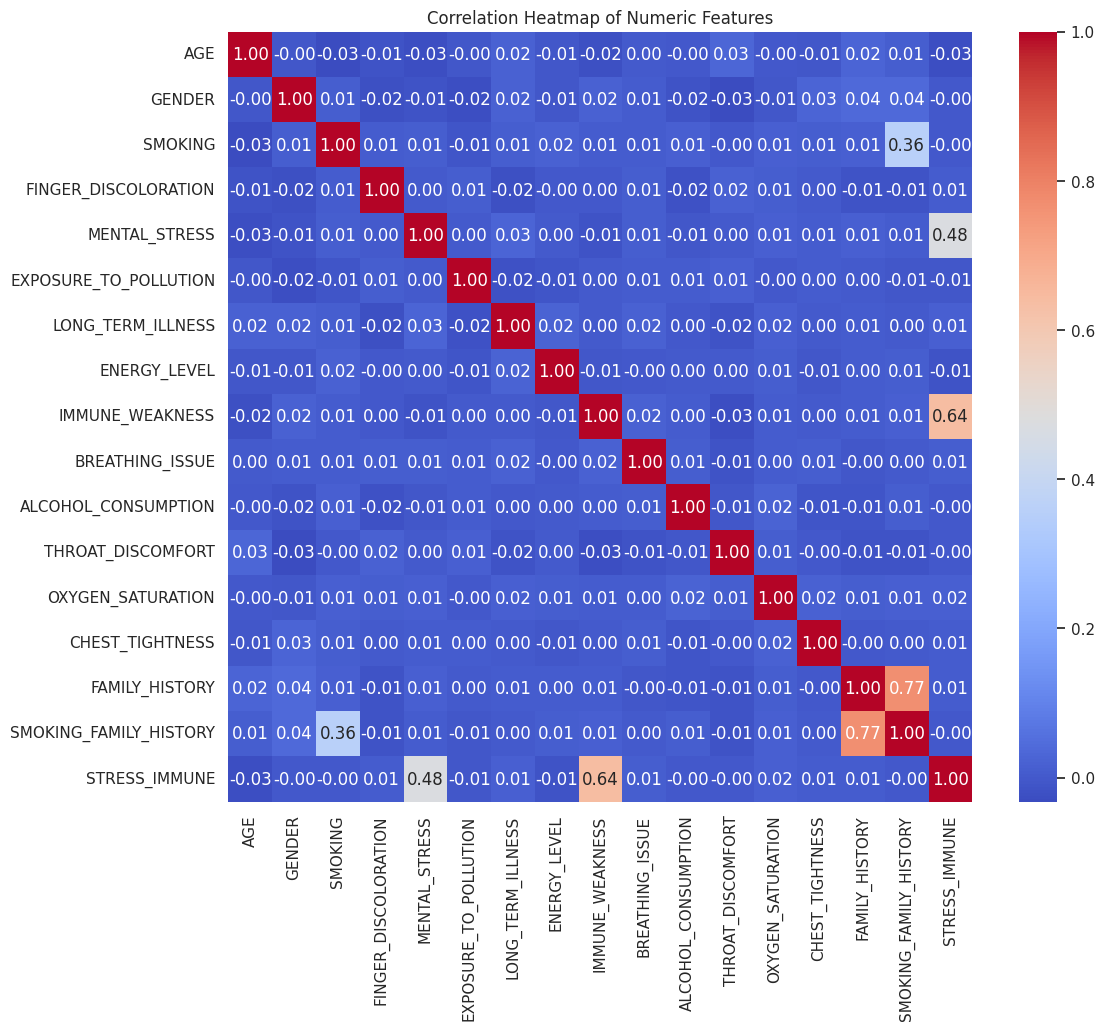

In [4]:
# Extract numeric features for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Only proceed if there are four or more numeric columns
if numeric_df.shape[1] >= 4:
    corr = numeric_df.corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a valid correlation heatmap.')

### Distribution and Categorical Plots

We further inspect the data with various plots including histograms, box plots, and count plots. These plots not only show the spread of the data but also reveal potential outliers or skewness in the distributions.

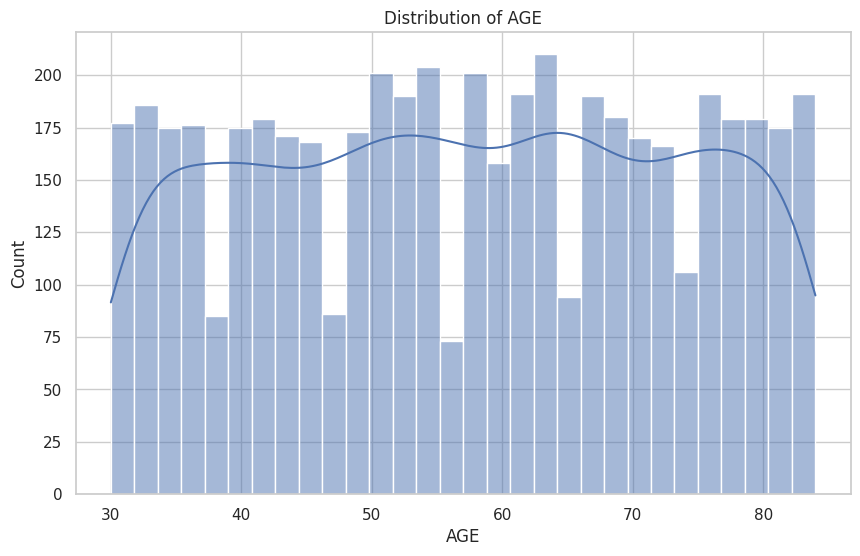

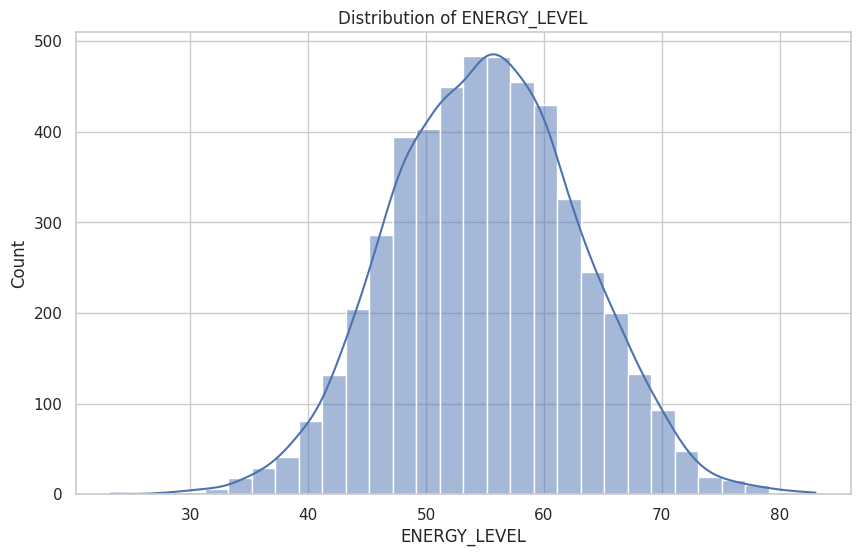

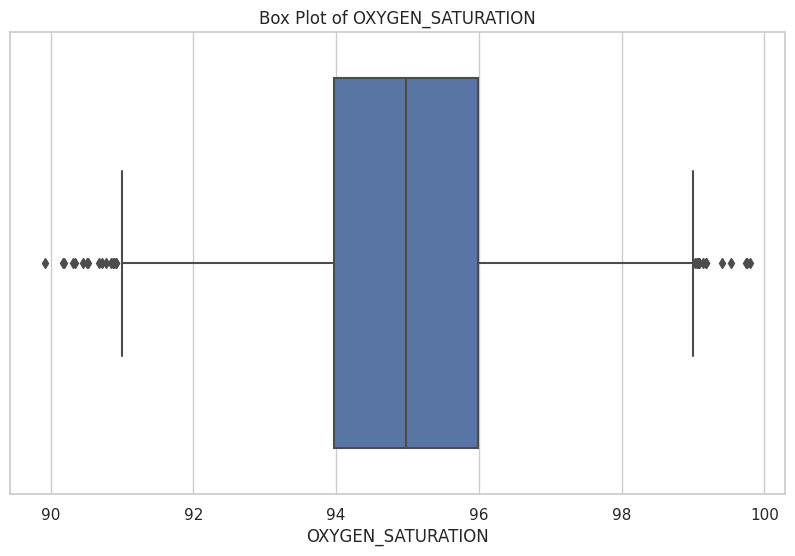

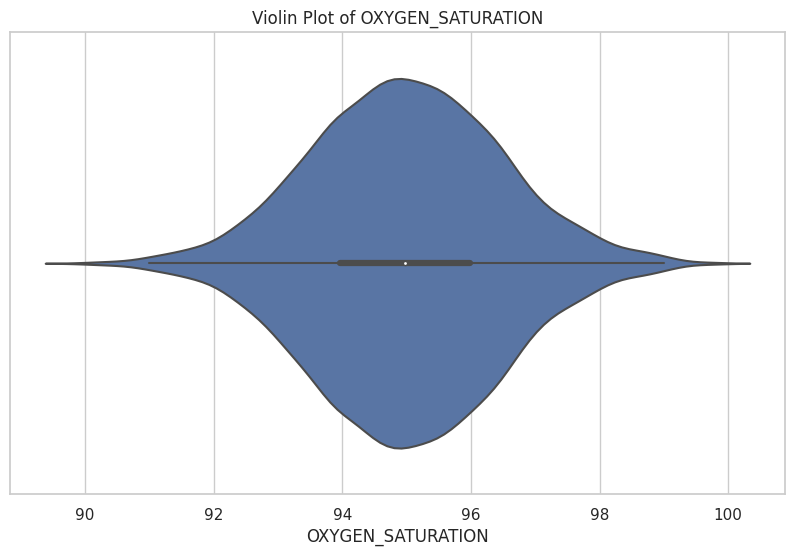

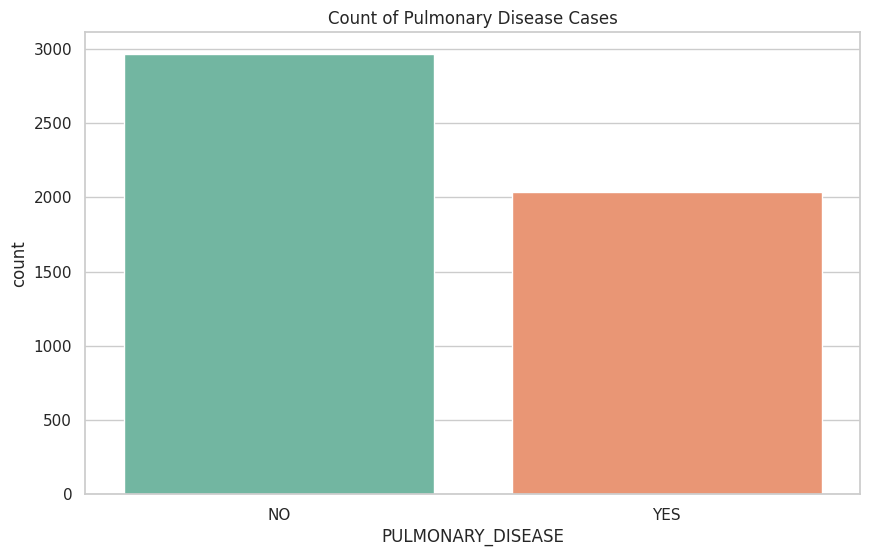

In [5]:
# Histogram for AGE and ENERGY_LEVEL (as examples)
plt.figure()
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Distribution of AGE')
plt.show()

plt.figure()
sns.histplot(df['ENERGY_LEVEL'], bins=30, kde=True)
plt.title('Distribution of ENERGY_LEVEL')
plt.show()

# Box plot and violin plot for OXYGEN_SATURATION
plt.figure()
sns.boxplot(x=df['OXYGEN_SATURATION'])
plt.title('Box Plot of OXYGEN_SATURATION')
plt.show()

plt.figure()
sns.violinplot(x=df['OXYGEN_SATURATION'])
plt.title('Violin Plot of OXYGEN_SATURATION')
plt.show()

# Count plot for the target variable 'PULMONARY_DISEASE'
plt.figure()
sns.countplot(x='PULMONARY_DISEASE', data=df, palette='Set2')
plt.title('Count of Pulmonary Disease Cases')
plt.show()

## Predictor Model

With a good understanding of the data, we can now build a prediction model. We use the 'PULMONARY_DISEASE' column as our target variable and apply a Random Forest classifier. Label encoding is applied to convert the target to a numerical format before model training.

Prediction Accuracy: 0.913


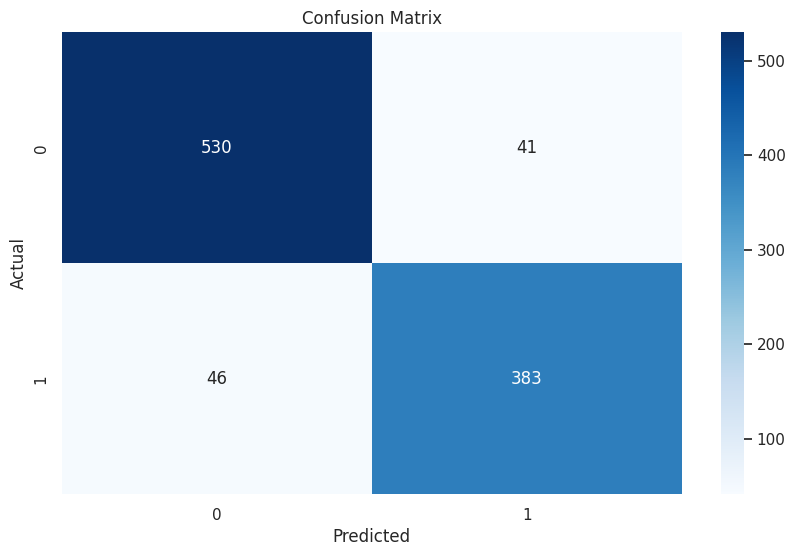

In [6]:
# Prepare data for prediction

# Assume 'PULMONARY_DISEASE' column contains categorical values, so we encode them
le = LabelEncoder()
df['PULMONARY_DISEASE_encoded'] = le.fit_transform(df['PULMONARY_DISEASE'])

# Define features and target. Here we drop the original target column and any non-feature columns if needed
features = df.drop(['PULMONARY_DISEASE', 'PULMONARY_DISEASE_encoded'], axis=1)
target = df['PULMONARY_DISEASE_encoded']

# For simplicity, use all features. In practice, feature selection may improve performance.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Prediction Accuracy:', acc)

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Conclusion and Future Work

We explored the dataset, performed extensive exploratory data analysis, and built a predictive model to classify pulmonary disease. The approach of using multiple visualization strategies provided valuable insights into the data structure and variable interactions. Future directions include:

- Feature selection and engineering to improve model performance
- Hyperparameter tuning and cross-validation for more robust predictions
- Exploring alternative models such as Gradient Boosting or Support Vector Machines
- Investigating the impact of removing or modifying outliers

This notebook is a demonstration of how multi-faceted analyses can lead to a better understanding of complex datasets. If you found this notebook insightful, an upvote would be appreciated.